<a href="https://colab.research.google.com/github/ExoticFanta/Master_Thesis/blob/main/EfficientNetB0_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
# Rescale pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Resize the images to 224x224 (EfficientNetB0 requires this)
x_train_resized = np.array([
    image.array_to_img(img[..., np.newaxis]).resize((84,84)) for img in x_train
])
x_test_resized = np.array([
    image.array_to_img(img[..., np.newaxis]).resize((84,84)) for img in x_test
])
# Convert the images to 3 channels (grayscale to RGB)
x_train_resized = np.repeat(x_train_resized[..., np.newaxis], 3, -1)
x_test_resized = np.repeat(x_test_resized[..., np.newaxis], 3, -1)

# Convert to the correct format for EfficientNetB0 (batch_size, height, width, channels)
#x_train_resized = np.array(x_train_resized)
#x_test_resized = np.array(x_test_resized)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(tf.__version__)

In [ ]:
datagen = ImageDataGenerator(shear_range = 0.2, #shear the image by 20%
                             zoom_range = 0.2, #zoom the image by 20%
                             rotation_range=25, #the images will be randomly rotated up to 25 degrees in either direction.
                             horizontal_flip = True)

In [ ]:
x_val_resized = x_train_resized[-10000:]  # Take the last 10,000 samples
x_train_resized = x_train_resized[:-10000]

y_val = y_train[-10000:]
y_train = y_train[:-10000]

print(x_val_resized.shape)
print(x_train_resized.shape)
print(y_val.shape)
print(y_train.shape)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
train_images = datagen.flow(x_train_resized, y_train, batch_size=32)

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,  # Exclude the top classifier layers
    weights='imagenet',  # Load pretrained weights from ImageNet
    input_shape=(84, 84,3)
)

# Freeze the base model
base_model.trainable = False

# Create new model on top
# ... (other code) ...

model = models.Sequential([
        base_model,  # Add the EfficientNetB0 model as the base
        layers.GlobalAveragePooling2D(),  # Pooling layer to reduce dimensions
        layers.Dense(280, activation='relu'),  # Dense layer with 280 units
        layers.Dropout(0.5),  # Dropout layer to reduce overfitting
        layers.Dense(10, activation='softmax')  # Output layer with 10 classes (Fashion MNIST has 10 classes)
    ])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,  #default learning_rate=0.001
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 3, 3, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 280)                 │         358,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 280)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,411,061 (16.83 MB)

 Trainable params: 361,490 (1.38 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:

history = model.fit(
        train_images,  # Training data
        validation_data=(x_val_resized, y_val),  # Validation data
        epochs=15, # now with 15 epochs
        batch_size=32  # Batch size
    )


In [ ]:
from google.colab import drive

# Mount the Google Drive at /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#save the model to store it
model.save('/content/drive/MyDrive/my_efficientnetb0_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

#loading the saved model to use whenever
model = load_model('/content/drive/MyDrive/my_efficientnetb0_model.h5')

In [ ]:
# Evaluate the model on the test set
x_test_resized = np.array(x_test_resized)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test_onehot, verbose=1)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

from sklearn.metrics import classification_report

y_pred = model.predict(x_test)  # Get predicted probabilities
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert to class labels

# Generate Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, digits=4))

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_resized)  # Get predicted probabilities
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert to class labels

# Generate Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 380ms/step

Classification Report:

              precision    recall  f1-score   support

           0     0.8069    0.8940    0.8482      1000
           1     0.9868    0.9720    0.9793      1000
           2     0.8925    0.7890    0.8376      1000
           3     0.8734    0.8690    0.8712      1000
           4     0.7705    0.8460    0.8065      1000
           5     0.9823    0.9450    0.9633      1000
           6     0.6901    0.6390    0.6636      1000
           7     0.9099    0.9700    0.9390      1000
           8     0.9860    0.9880    0.9870      1000
           9     0.9692    0.9440    0.9564      1000

    accuracy                         0.8856     10000
   macro avg     0.8868    0.8856    0.8852     10000
weighted avg     0.8868    0.8856    0.8852     10000



In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 340ms/step


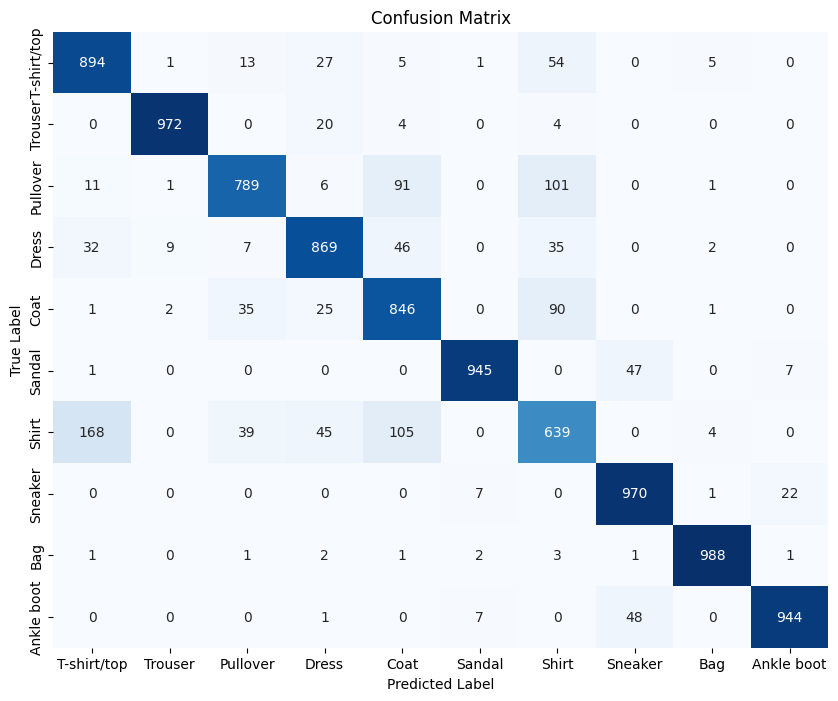

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker",
    "Bag", "Ankle boot"
]

# Predict the values from the test dataset
x_test_resized = np.array(x_test_resized)
test_predictions = model.predict(x_test_resized)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# y_test is already a 1D array of class labels, so no need for argmax
test_true_classes = y_test  # Assign y_test directly to test_true_classes

# Compute the confusion matrix
cm = confusion_matrix(test_true_classes, test_predictions_classes)

# Plotting the confusion matrix with class labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

def display_sample(sample_images, sample_labels, sample_predictions):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        ax.imshow(sample_images[i].reshape(32, 32), cmap='gray')  # Change to 32x32
        ax.set_xlabel(f"True: {class_names[sample_labels[i]]}\nPredicted: {class_names[sample_predictions[i]]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()


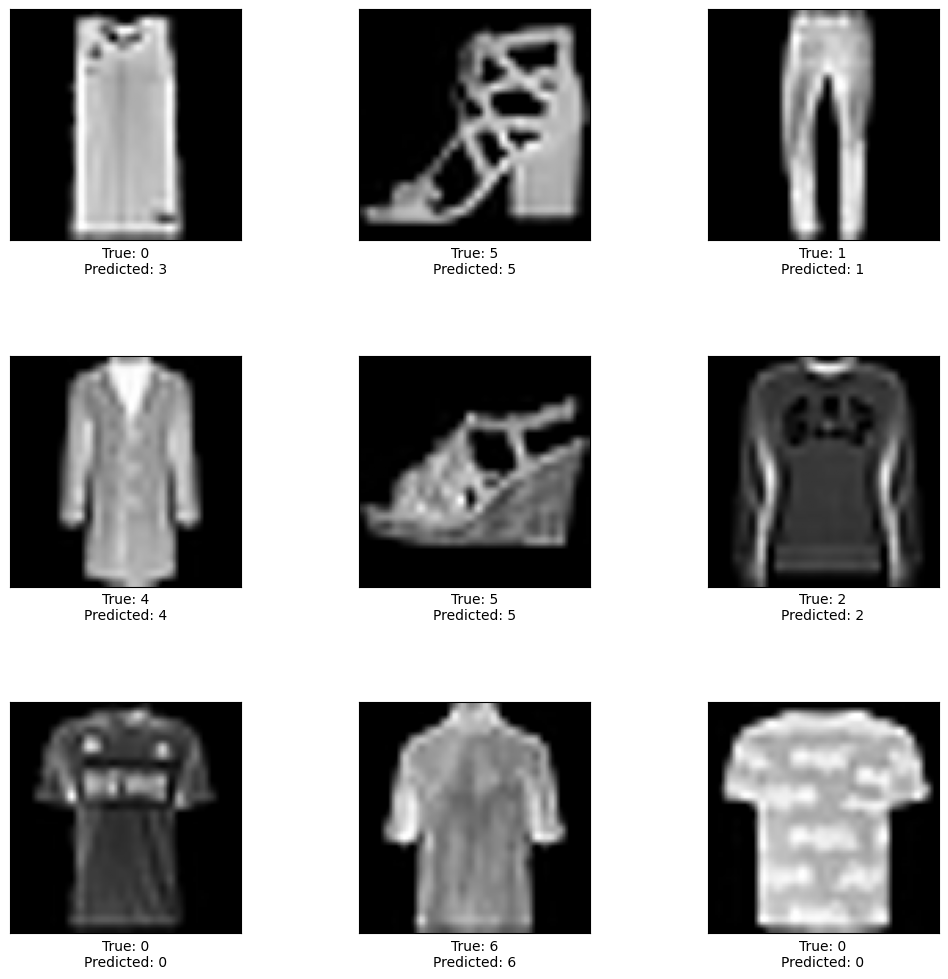

In [ ]:
# Convert RGB to Grayscale for visualization; this assumes the images were resized to 86x86
test_images_gray = np.dot(x_test_resized[...,:3], [0.2989, 0.5870, 0.1140])

# Selecting a few images from the test set
random_indices = np.random.choice(len(test_images_gray), 9, replace=False)
sample_images = test_images_gray[random_indices]
sample_labels = test_true_classes[random_indices]
sample_predictions = test_predictions_classes[random_indices]

# Display the selected images and their labels
def display_sample(sample_images, sample_labels, sample_predictions):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        # Reshape to (84, 84) instead of (32, 32)
        ax.imshow(sample_images[i].reshape(84, 84), cmap='gray')
        ax.set_xlabel(f"True: {sample_labels[i]}\nPredicted: {sample_predictions[i]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

display_sample(sample_images, sample_labels, sample_predictions)

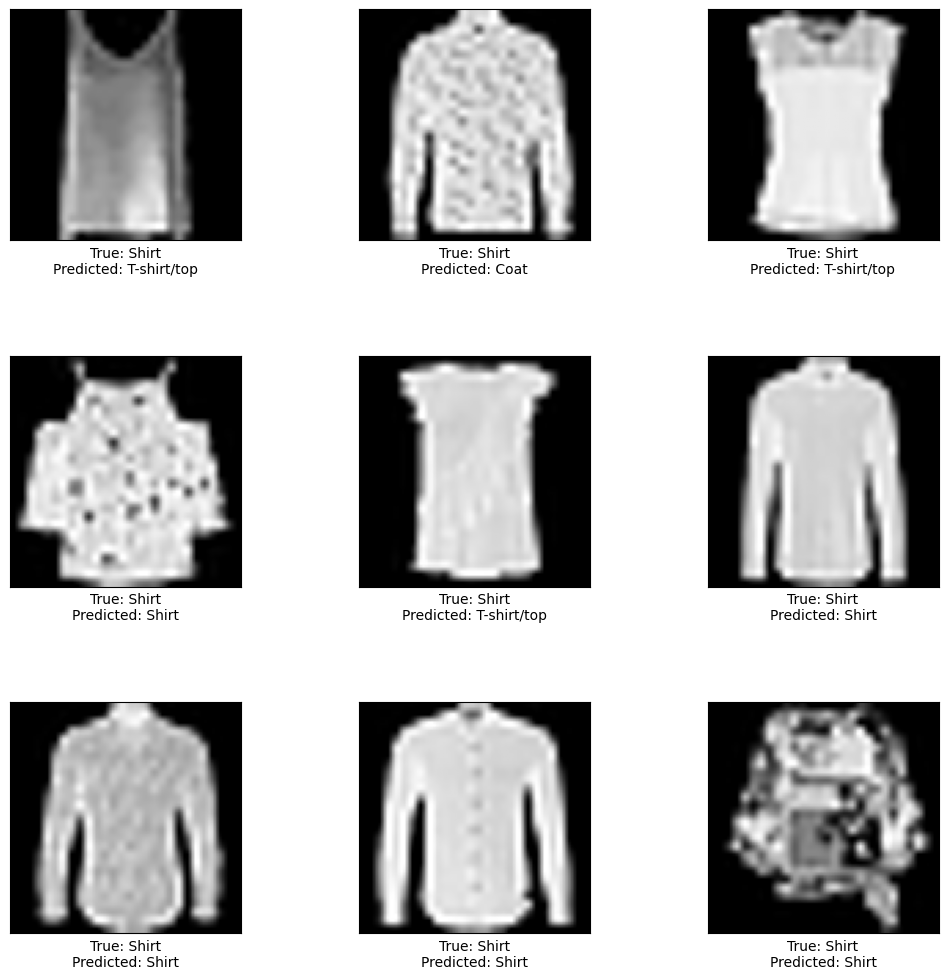

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define class index for "Shirt" category
shirt_index = 6  # "Shirt" corresponds to index 6 in Fashion MNIST

# Convert RGB to Grayscale for visualization; assumes images were resized to 86x86
test_images_gray = np.dot(x_test_resized[...,:3], [0.2989, 0.5870, 0.1140])

# Filter indices for only "Shirt" category
shirt_indices = np.where(test_true_classes == shirt_index)[0]

# Randomly select 9 indices from the "Shirt" category
random_shirt_indices = np.random.choice(shirt_indices, 9, replace=False)

# Extract samples for the selected indices
sample_images = test_images_gray[random_shirt_indices]
sample_labels = test_true_classes[random_shirt_indices]
sample_predictions = test_predictions_classes[random_shirt_indices]

# Function to display the selected images and their labels
def display_sample(sample_images, sample_labels, sample_predictions):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        # Reshape to (84, 84) for display (assuming resized images)
        ax.imshow(sample_images[i].reshape(84, 84), cmap='gray')
        ax.set_xlabel(f"True: {class_names[sample_labels[i]]}\nPredicted: {class_names[sample_predictions[i]]}")
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

# Display random Shirt category samples
display_sample(sample_images, sample_labels, sample_predictions)
